In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
print(np.__version__)

1.21.6


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_test = data[0:1000].T
y_test = data_test[0]
x_test = data_test[1:n] / 255 

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n] / 255 

In [4]:
def init_parems():
    w1 = np.random.rand(10,784) - 0.5 
    b1 = np.random.rand(10,1) - 0.5 
    w2 = np.random.rand(10,10) - 0.5 
    b2 = np.random.rand(10,1) - 0.5 
    return w1,b1,w2,b2 

def Relu(z):
    return np.maximum(z,0)

def softmax(z):
    return np.exp(z) / sum(np.exp(z))


def forward_prop(w1,b1,w2,b2,X):
    z1 = w1.dot(X) + b1 
    a1 = Relu(z1)
    z2 = w2.dot(a1) + b2 
    a2 = softmax(z2)
    return z1,a1,z2,a2 

def one_hot_encode(Y):
    one_hot_y = np.zeros((Y.size,Y.max()+1))
    one_hot_y[np.arange(Y.size),Y] = 1 
    one_hot_y = one_hot_y.T
    return one_hot_y

def deriv_relu(z):
    return z > 0

def backward_prop(z1,a1,z2,a2,w2,X,Y):
    one_hot_y = one_hot_encode(Y)
    dz2 = a2 - one_hot_y 
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * deriv_relu(z1)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1)
    return dw1, db1, dw2, db2 

def update_params(w1,b1,w2,b2,dw1, db1, dw2, db2,alpha):
    w1 = w1  - alpha * dw1 
    w2 = w2  - alpha * dw2 
    b1 = b1  - alpha * db1 
    b2 = b2  - alpha * db2
    return w1,b1,w2,b2 


    
    
 

In [5]:
def get_predictions(a2):
    return np.argmax(a2,0)

def get_accuracy(predictions,Y):
    return np.sum(predictions == Y ) / Y.size

def gradient_descent(x,y,iterations,alpha ):
    w1,b1,w2,b2  = init_parems()
    for i in range(iterations):
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,x)
        dw1, db1, dw2, db2  = backward_prop(z1,a1,z2,a2,w2,x,y)
        # print(w1,b1,w2,b2)
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1, db1, dw2, db2,alpha)
        # print(w1,b1,w2,b2)
        if i % 50 == 0 :
            print(f"iteration {i}:{iterations}")
            print(f"Accuracy : {get_accuracy(get_predictions(a2),y)} ")
    return w1,b1,w2,b2

    
    
    

In [6]:
w1,b1,w2,b2 = gradient_descent(x_train,y_train,500,0.10)


iteration 0:500
Accuracy : 0.07851219512195122 
iteration 50:500
Accuracy : 0.4180243902439024 
iteration 100:500
Accuracy : 0.6178536585365854 
iteration 150:500
Accuracy : 0.704390243902439 
iteration 200:500
Accuracy : 0.7526341463414634 
iteration 250:500
Accuracy : 0.7821707317073171 
iteration 300:500
Accuracy : 0.8023902439024391 
iteration 350:500
Accuracy : 0.8176829268292682 
iteration 400:500
Accuracy : 0.8300731707317073 
iteration 450:500
Accuracy : 0.8399756097560975 


In [7]:
def make_predictions(X,w1,b1,w2,b2 ):
  _,_,_,a2 = forward_prop(w1,b1,w2,b2,X)
  predictions = get_predictions(a2)
  return predictions
def test_prediction(index,w1,b1,w2,b2 ):
  current_image = x_train[:,index,None]
  prediction = make_predictions(x_train[:,index,None],w1,b1,w2,b2 )
  label = y_train[index]
  print("Prediction : ",prediction)
  print("Label : ",label)
  current_image = current_image.reshape((28,28)) * 255 
  plt.gray()
  plt.imshow(current_image,interpolation="nearest")
  plt.show()


Prediction :  [7]
Label :  7


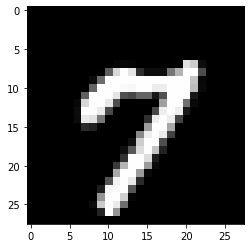

In [8]:
test_prediction(2302,w1,b1,w2,b2 )

In [12]:
predictions = make_predictions(x_test,w1,b1,w2,b2)
print(get_accuracy(predictions,y_test))

0.834


0.834
